In [10]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm


In [11]:
class_names = ['aircraft', 'tank', 'pistol']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [17]:
def load_data():

    datasets = ['/content/drive/MyDrive/Colab_Notebooks/unzipped_data/data_2/train', '/content/drive/MyDrive/Colab_Notebooks/unzipped_data/data_2/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                #print(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [18]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  1%|          | 6/1000 [00:00<00:17, 56.59it/s]

Loading /content/drive/MyDrive/Colab_Notebooks/unzipped_data/data_2/train


  2%|▎         | 5/200 [00:00<00:04, 44.93it/s]

Loading /content/drive/MyDrive/Colab_Notebooks/unzipped_data/data_2/test


100%|██████████| 200/200 [00:10<00:00, 19.09it/s]


In [19]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [20]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 3000
Number of testing examples: 600
Each image is of size: (150, 150)


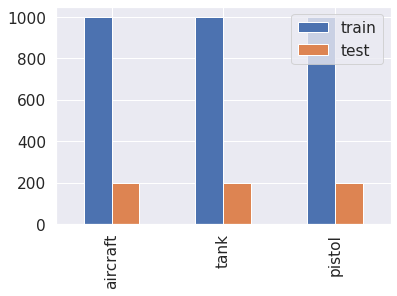

In [21]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

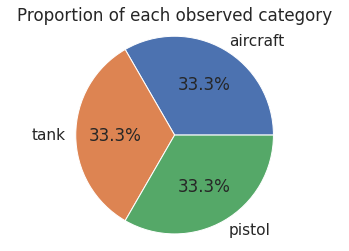

In [23]:
plt.pie(train_counts,
        explode=(0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [24]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [25]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

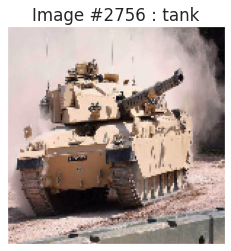

In [31]:
display_random_image(class_names, train_images, train_labels)

In [39]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

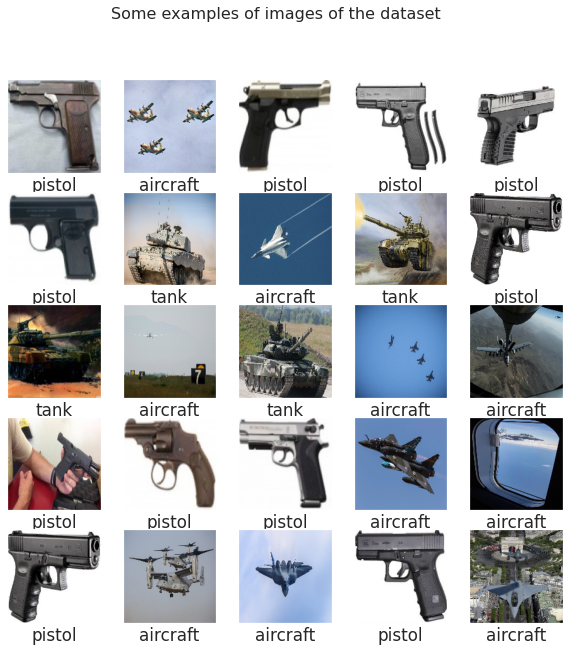

In [40]:
display_examples(class_names, train_images, train_labels)

In [41]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])


In [49]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
19/19 [==============================] - 2s 71ms/step - loss: 2.8341 - accuracy: 0.4047 - val_loss: 0.6611 - val_accuracy: 0.7017
Epoch 2/20
19/19 [==============================] - 1s 61ms/step - loss: 0.5429 - accuracy: 0.7829 - val_loss: 0.4939 - val_accuracy: 0.8233
Epoch 3/20
19/19 [==============================] - 1s 62ms/step - loss: 0.3367 - accuracy: 0.8717 - val_loss: 0.3258 - val_accuracy: 0.8833
Epoch 4/20
19/19 [==============================] - 1s 62ms/step - loss: 0.1715 - accuracy: 0.9480 - val_loss: 0.2869 - val_accuracy: 0.8917
Epoch 5/20
19/19 [==============================] - 1s 61ms/step - loss: 0.1115 - accuracy: 0.9706 - val_loss: 0.3067 - val_accuracy: 0.8717
Epoch 6/20
19/19 [==============================] - 1s 61ms/step - loss: 0.0830 - accuracy: 0.9796 - val_loss: 0.2801 - val_accuracy: 0.8867
Epoch 7/20
19/19 [==============================] - 1s 62ms/step - loss: 0.0483 - accuracy: 0.9938 - val_loss: 0.2956 - val_accuracy: 0.8933
Epoch 8/20
19

In [51]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_accuracy vs val_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

    plot_accuracy_loss(history)

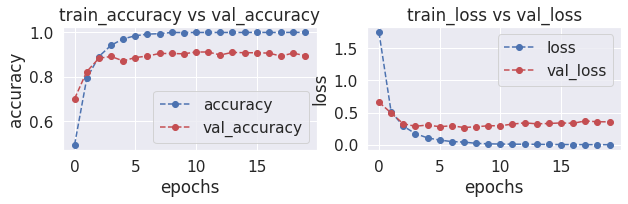

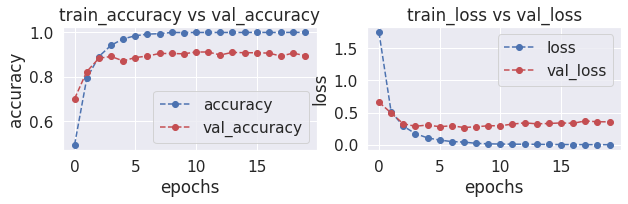

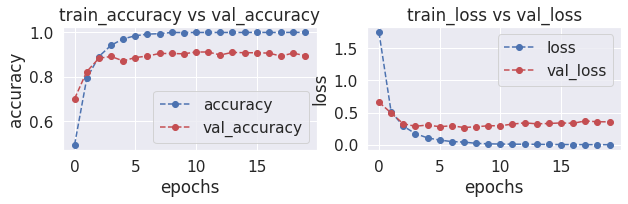

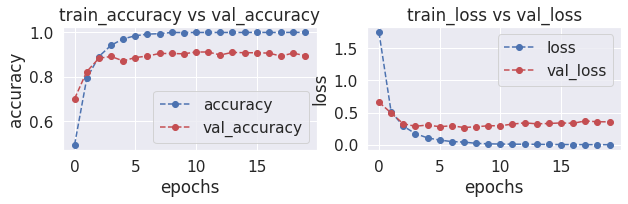

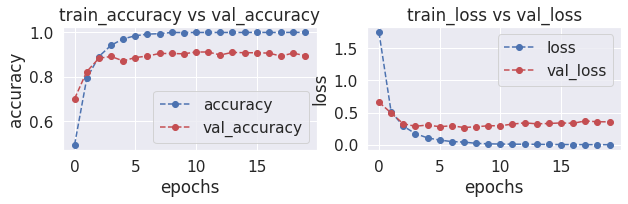

KeyboardInterrupt: ignored

In [52]:
plot_accuracy_loss(history)

In [53]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

local_weights_file = '/content/drive/MyDrive/Colab_Notebooks/yolov3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
     layer.trainable = False
        
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_98[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [54]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(3, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

history=model.fit(train_images,train_labels,epochs=20,validation_data=(test_images,test_labels))

last layer output shape:  (None, 7, 7, 768)
Epoch 1/20
94/94 [==============================] - 8s 57ms/step - loss: 0.2444 - acc: 0.9162 - val_loss: 0.0469 - val_acc: 0.9867
Epoch 2/20
94/94 [==============================] - 4s 46ms/step - loss: 0.0136 - acc: 0.9960 - val_loss: 0.0568 - val_acc: 0.9867
Epoch 3/20
94/94 [==============================] - 4s 46ms/step - loss: 0.0022 - acc: 0.9993 - val_loss: 0.0493 - val_acc: 0.9900
Epoch 4/20
94/94 [==============================] - 4s 47ms/step - loss: 4.7631e-05 - acc: 1.0000 - val_loss: 0.0471 - val_acc: 0.9883
Epoch 5/20
94/94 [==============================] - 4s 47ms/step - loss: 2.2906e-06 - acc: 1.0000 - val_loss: 0.0716 - val_acc: 0.9883
Epoch 6/20
94/94 [==============================] - 4s 47ms/step - loss: 1.4639e-05 - acc: 1.0000 - val_loss: 0.0941 - val_acc: 0.9800
Epoch 7/20
94/94 [==============================] - 4s 47ms/step - loss: 4.3007e-06 - acc: 1.0000 - val_loss: 0.0618 - val_acc: 0.9900
Epoch 8/20
94/94 [=====

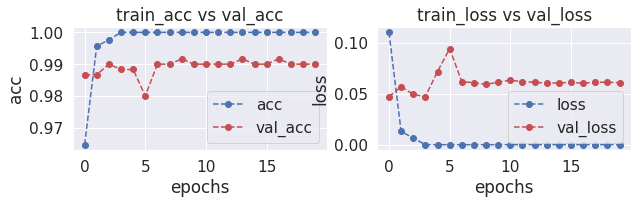

In [55]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("acc")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

plot_accuracy_loss(history)

In [61]:
file='/content/drive/MyDrive/Colab_Notebooks/yolov3/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
pretrained_model=VGG16(input_shape = (150, 150, 3), 
                        include_top = False, 
                        weights =None)
pretrained_model.load_weights(file)

for layer in pretrained_model.layers:
     layer.trainable = False

last_layer = pretrained_model.get_layer('block5_pool')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(3, activation='softmax')(x)           

model_vgg = Model(pretrained_model.input, x) 


model_vgg.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

pre_trained_model_vgg.summary()

history = model_vgg.fit(train_images,train_labels,epochs=20,validation_data=(test_images,test_labels))

last layer of vgg : output shape:  (None, 4, 4, 512)
Epoch 1/20
94/94 [==============================] - 9s 93ms/step - loss: 0.3619 - acc: 0.8626 - val_loss: 0.4792 - val_acc: 0.8433
Epoch 2/20
94/94 [==============================] - 8s 89ms/step - loss: 0.0918 - acc: 0.9651 - val_loss: 0.1141 - val_acc: 0.9600
Epoch 3/20
94/94 [==============================] - 8s 89ms/step - loss: 0.0368 - acc: 0.9858 - val_loss: 0.1538 - val_acc: 0.9550
Epoch 4/20
94/94 [==============================] - 8s 90ms/step - loss: 0.0256 - acc: 0.9899 - val_loss: 0.1087 - val_acc: 0.9633
Epoch 5/20
94/94 [==============================] - 8s 90ms/step - loss: 0.0172 - acc: 0.9936 - val_loss: 0.1603 - val_acc: 0.9550
Epoch 6/20
94/94 [==============================] - 8s 90ms/step - loss: 0.0181 - acc: 0.9956 - val_loss: 0.1490 - val_acc: 0.9650
Epoch 7/20
94/94 [==============================] - 8s 90ms/step - loss: 0.0058 - acc: 0.9991 - val_loss: 0.1416 - val_acc: 0.9633
Epoch 8/20
94/94 [============

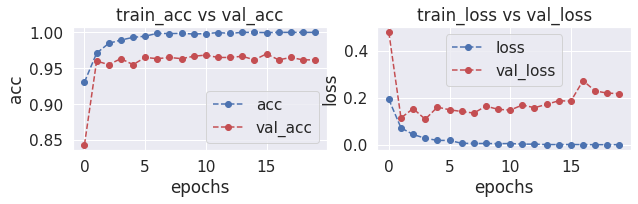

In [62]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("acc")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

plot_accuracy_loss(history)

In [67]:
from tensorflow.keras.applications import ResNet50

file_resnet='/content/drive/MyDrive/Colab_Notebooks/yolov3/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
pretrained_model=ResNet50( input_shape=(150,150,3),
                                  include_top=False,
                                  weights=None)

for layer in pretrained_model.layers:
     layer.trainable = False
       
last_layer = pretrained_model.get_layer('conv5_block3_out')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(3, activation='softmax')(x)


model_resnet = Model(pretrained_model.input, x) 

model_resnet.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

pre_trained_model_resnet.summary()

history = model_resnet.fit(train_images,train_labels,epochs=20,validation_data=(test_images,test_labels))

last layer of vgg : output shape:  (None, 5, 5, 2048)
Epoch 1/20
94/94 [==============================] - 12s 97ms/step - loss: 1.0006 - acc: 0.5079 - val_loss: 0.6956 - val_acc: 0.7400
Epoch 2/20
94/94 [==============================] - 8s 88ms/step - loss: 0.6957 - acc: 0.6990 - val_loss: 0.5766 - val_acc: 0.8117
Epoch 3/20
94/94 [==============================] - 8s 87ms/step - loss: 0.5738 - acc: 0.7763 - val_loss: 0.5156 - val_acc: 0.8017
Epoch 4/20
94/94 [==============================] - 8s 85ms/step - loss: 0.5179 - acc: 0.7976 - val_loss: 0.5833 - val_acc: 0.7517
Epoch 5/20
94/94 [==============================] - 8s 84ms/step - loss: 0.4838 - acc: 0.8134 - val_loss: 0.4572 - val_acc: 0.8117
Epoch 6/20
94/94 [==============================] - 8s 84ms/step - loss: 0.4438 - acc: 0.8281 - val_loss: 0.4219 - val_acc: 0.8217
Epoch 7/20
94/94 [==============================] - 8s 83ms/step - loss: 0.4592 - acc: 0.8238 - val_loss: 0.4185 - val_acc: 0.8333
Epoch 8/20
94/94 [==========

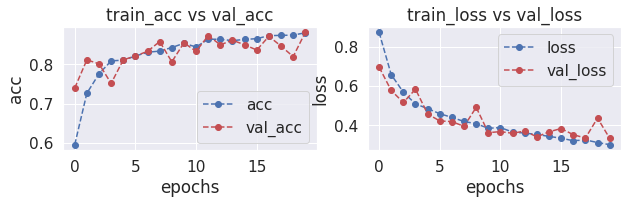

In [69]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("acc")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

plot_accuracy_loss(history)